In [2]:
import numpy as np
import pandas as pd

In [6]:
import pandas as pd
df = pd.read_json('vis(3).json')
print(df)

     gamma  delta    T  z_with_watermark  ppl_with_watermark
0      0.1    0.0    0              0.00              2.9877
1      0.1    0.0   10              0.20              2.9877
2      0.1    0.0   20              0.23              2.9877
3      0.1    0.0   30              0.45              2.9877
4      0.1    0.0   40              0.60              2.9877
..     ...    ...  ...               ...                 ...
236    0.9   10.0   50              3.33              1.8697
237    0.9   10.0   75              3.33              4.9209
238    0.9   10.0  100              3.33              4.1491
239    0.9   10.0  125              3.33              1.7680
240    0.9   10.0  150              3.33              3.1344

[241 rows x 5 columns]


In [8]:
sensitive_analysis = pd.read_csv('file.txt', delimiter=' ',header = None) 
print(sensitive_analysis)

FileNotFoundError: [Errno 2] No such file or directory: 'file.txt'

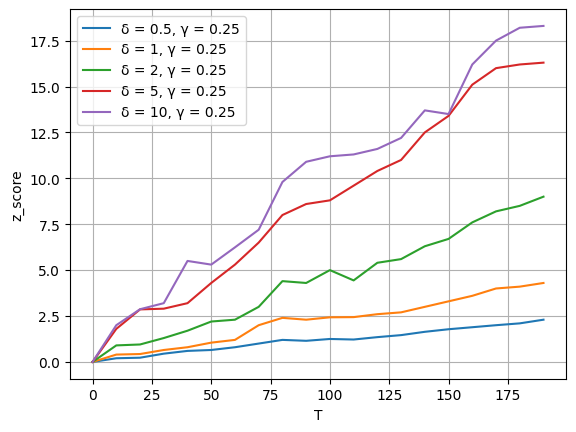

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# 假设 df 是你的 DataFrame，包含四列数据

# 提取两列满足特定条件的数据
delta_list = [0.5,1,2,5,10]
gamma_list =[0.1,0.25,0.5,0.75,0.9]
# for i in delta_list:
#     for j in gamma_list:
#         filtered_df = df[(df.iloc[:, 1] == i) & (df.iloc[:, 0]== j)]
#         x = filtered_df.iloc[:, 3]
#         y = filtered_df.iloc[:, 2]
#         print(x)
#         plt.plot(x, y, label='δ = {}, gamma = {}'.format(i, j))
# for j in gamma_list:
#     filtered_df = df[(df.iloc[:, 1] == 5) & (df.iloc[:, 0]== j)]
#     x = filtered_df.iloc[:, 2]
#     y = filtered_df.iloc[:, 3]
#     # print(x)
#     plt.plot(x, y, label='δ = {}, gamma = {}'.format(10, j))

for i in delta_list:
    filtered_df = df[(df.iloc[:, 1] == i) & (df.iloc[:, 0]== 0.25)]
    x = filtered_df.iloc[:, 2]
    y = filtered_df.iloc[:, 3]
    # print(x)
    plt.plot(x, y, label='δ = {}, γ = {}'.format(i, 0.25))
# 添加标签和标题
plt.xlabel('T')
plt.ylabel('z_score')
# plt.title('Plot of Filtered Data')
plt.legend()
plt.grid(True)

# 显示图形
plt.show()


30


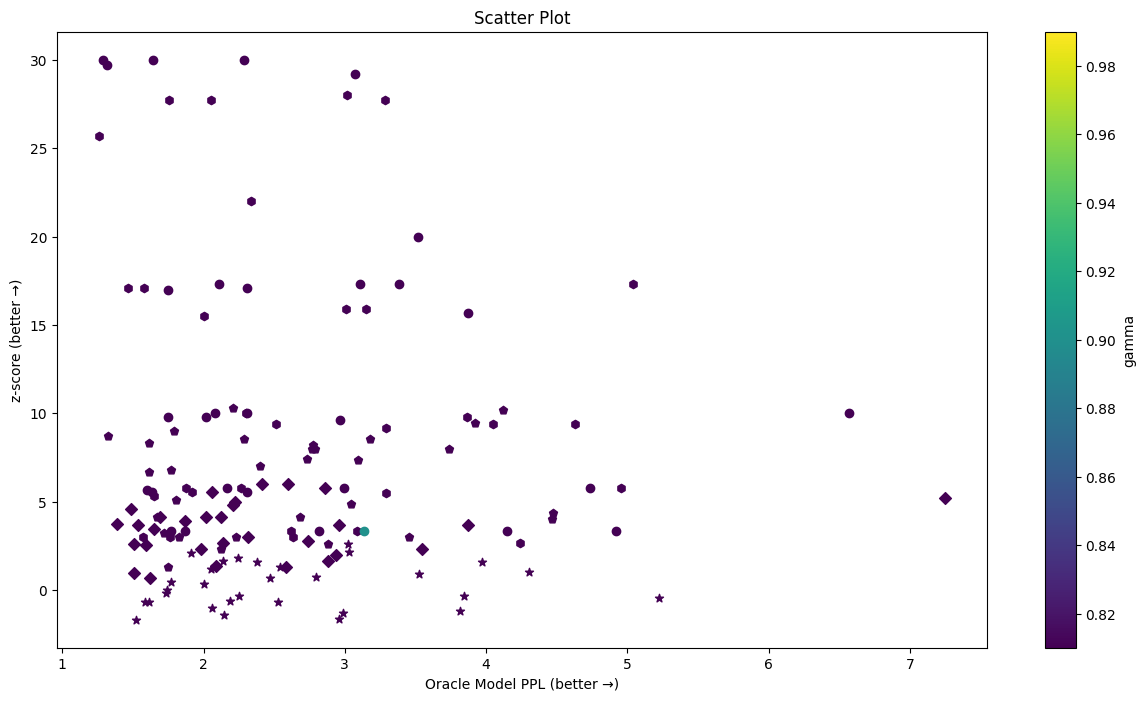

In [ ]:
import matplotlib.pyplot as plt

# 假设 df 是你的 DataFrame，具有 x、y、label 和 color bar 列
# 例如，df = pd.read_csv('your_file.txt', delimiter='\t')

# 提取数据列
gamma = df.iloc[:, 0]
delta = df.iloc[:, 1]
T= df.iloc[:, 2]
z_score = df.iloc[:, 3]
ppl = df.iloc[:, 4]
shape = {0:"*", 1:'D', 2:"p", 5:'h', 10:'o'}
fig = plt.figure(figsize=(15,8))
print(len(df[gamma==0.9]))
for i in range(len(ppl)):
    plt.scatter(ppl[i], z_score[i], c = gamma[i], cmap='viridis', marker = shape[delta[i]])
    # plt.scatter(ppl[i], z_score[i], c = gamma[i], cmap='viridis', label='δ = {}'.format(delta[i]), marker=shape[delta[i]])
plt.colorbar(label='gamma')


# 添加标签和标题
plt.xlabel('Oracle Model PPL (better →)')
plt.ylabel('z-score (better →)')
plt.title('Scatter Plot')
# 显示图形
plt.show()


In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)
# 绘制 ROC 曲线
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()